In [2]:
import pandas as pd
from sklearn import preprocessing
import numpy as np 
from keras.models import Sequential
from keras.layers import Input, Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [5]:
!wget -O merge_labeled_detect.csv https://raw.githubusercontent.com/a962702/Senior_Project/main/detection/merge_labeled_detect.csv
dataset = pd.read_csv('/content/merge_labeled_detect.csv')

#### label coding for nominal values
def label_coding(label):
    dataset[label]= label_encoder.fit_transform(dataset[label]) 
    dataset[label].unique()
    
### label encoding
label_encoder = preprocessing.LabelEncoder() 
label_coding('Flow ID')
label_coding('Src IP')
label_coding('Dst IP')
label_coding('Timestamp')
label_coding('Label')

### extracting features
X=dataset.iloc[:,:-1]
X=X.values

print("+-inf",sum(np.isinf(X)))
print("inf",sum(np.isposinf(X)))
print("-inf",sum(np.isneginf(X)))
print("nan",sum(np.isnan(X)))
print("fin",sum(np.isfinite(X)))

X = np.where(np.isnan(X), 0, X)
X = np.where(np.isposinf(X), 0, X)
X = np.where(np.isneginf(X), 0, X)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Y = dataset['Label'].values

--2022-07-12 12:58:20--  https://raw.githubusercontent.com/a962702/Senior_Project/main/detection/merge_labeled_detect.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15929831 (15M) [text/plain]
Saving to: ‘merge_labeled_detect.csv’

merge_labeled_detec 100%[===================>]  15.19M  --.-KB/s    in 0.05s   

2022-07-12 12:58:20 (320 MB/s) - ‘merge_labeled_detect.csv’ saved [15929831/15929831]

+-inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  

In [28]:
model = Sequential()
InputLayer = Input( batch_input_shape=(None, 83), name="dense_input", dtype=tf.float32, sparse=False, ragged=False)
model.add(InputLayer)
model.add(Dense(512, batch_input_shape=(None, 83), name="dense", dtype=tf.float32, activation="sigmoid"))
model.add(Dense(256, name="dense_1", dtype=tf.float32, activation="linear"))
model.add(Dense(128, name="dense_2", dtype=tf.float32, activation="linear"))
model.add(Dense(1, name="dense_3", dtype=tf.float32, activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['acc'])
model.summary()

text_file = open("NN.json", "r")
data = text_file.read()
model = tf.keras.models.model_from_json(data)
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               43008     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 207,361
Trainable params: 207,361
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)              

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.05)

Epoch 1/100
863/863 [==============================] - 4s 4ms/step - loss: 4.5967e-04 - acc: 1.0000 - val_loss: 1.0183e-19 - val_acc: 1.0000
Epoch 2/100
863/863 [==============================] - 3s 4ms/step - loss: 7.7938e-20 - acc: 1.0000 - val_loss: 1.0183e-19 - val_acc: 1.0000
Epoch 3/100
863/863 [==============================] - 3s 4ms/step - loss: 7.7938e-20 - acc: 1.0000 - val_loss: 1.0183e-19 - val_acc: 1.0000
Epoch 4/100
863/863 [==============================] - 3s 4ms/step - loss: 7.7938e-20 - acc: 1.0000 - val_loss: 1.0183e-19 - val_acc: 1.0000
Epoch 5/100
863/863 [==============================] - 3s 4ms/step - loss: 7.7938e-20 - acc: 1.0000 - val_loss: 1.0183e-19 - val_acc: 1.0000
Epoch 6/100
 44/863 [>.............................] - ETA: 2s - loss: 9.8103e-20 - acc: 1.0000

KeyboardInterrupt: ignored

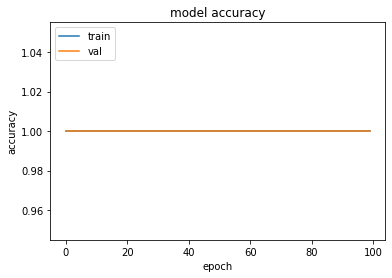

In [9]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

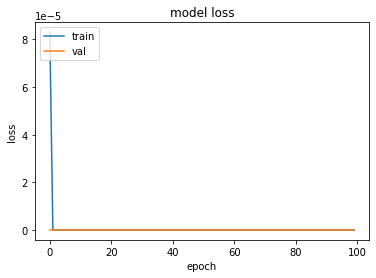

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
loss , accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.5f%%, Loss %f' % (100*accuracy, loss))

390/390 [==============================] - 1s 3ms/step - loss: 1.0154e-21 - acc: 1.0000
Accuracy: 100.00000%, Loss 0.000000


In [12]:
y_pred = model.predict(X_test)
y_true = np.reshape(Y_test, (Y_test.size, 1))
y_pred[y_pred >= 0.99] = 1
y_pred[y_pred < 0.99] = 0
print(y_true.shape)
print(y_pred.shape)

(12452, 1)
(12452, 1)


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12452

    accuracy                           1.00     12452
   macro avg       1.00      1.00      1.00     12452
weighted avg       1.00      1.00      1.00     12452



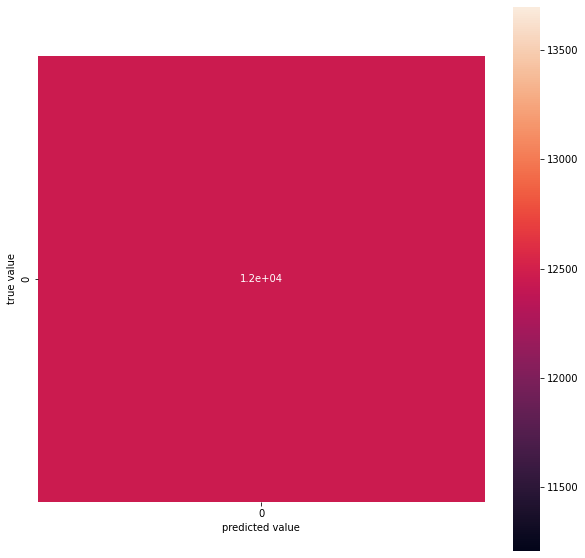

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat,square= True, annot=True, cbar= True, ax=ax)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier 

def ann_classifier(optimizer = 'adam'): 
    model = tf.keras.models.model_from_json(data)
    model.compile(optimizer=optimizer, loss='binary_crossentropy' , metrics=['accuracy'])
    return model 

ann = KerasClassifier(build_fn = ann_classifier)
grid = GridSearchCV(estimator = ann,param_grid = [{'epochs': [10, 25, 50],'optimizer': ['adam', 'rmsprop'],'validation_split': [0.05]}], scoring = 'accuracy',cv = 5, n_jobs = -1)
grid.fit(X_train, Y_train)
best_accuracy = grid.best_score_ 
best_param = grid.best_params_ 
print('最佳準確率 : {:.2f}%'.format(best_accuracy*100)) 
print('最佳參數為 : ',best_param)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Epoch 1/10
863/863 [==============================] - 34s 4ms/step - loss: 8.8972e-04 - accuracy: 0.9993 - val_loss: 6.2787e-19 - val_accuracy: 1.0000
Epoch 2/10
863/863 [==============================] - 4s 4ms/step - loss: 5.7796e-19 - accuracy: 1.0000 - val_loss: 6.2787e-19 - val_accuracy: 1.0000
Epoch 3/10
863/863 [==============================] - 3s 4ms/step - loss: 5.7796e-19 - accuracy: 1.0000 - val_loss: 6.2787e-19 - val_accuracy: 1.0000
Epoch 4/10
863/863 [==============================] - 4s 4ms/step - loss: 5.7796e-19 - accuracy: 1.0000 - val_loss: 6.2787e-19 - val_accuracy: 1.0000
Epoch 5/10
863/863 [==============================] - 4s 4ms/step - loss: 5.7796e-19 - accuracy: 1.0000 - val_loss: 6.2787e-19 - val_accuracy: 1.0000
Epoch 6/10
863/863 [==============================] - 4s 4ms/step - loss: 5.7796e-19 - accuracy: 1.0000 - val_loss: 6.2787e-19 - val_accuracy: 1.0000
Epoch 7/10
863/863 [==============================] - 4s 4ms/step - loss: 5.7796e-19 - accuracy: 1.